In [1]:
''''
Author:
u3275582, u3216765, u3284179, 4483 Undergraduate 28, Assessment 3: Programming project, 21/ 10/2024
Programming:
// Code adapted from BostonHousPriceProject_Final.ipynb example:
// https://uclearn.canberra.edu.au/courses/16822/files/5397584?module_item_id=1346775
'''

"'\nAuthor:\nu3275582, u3216765, u3284179, 4483 Undergraduate 28, Assessment 3: Programming project, 21/ 10/2024\nProgramming:\n// Code adapted from BostonHousPriceProject_Final.ipynb example:\n// https://uclearn.canberra.edu.au/courses/16822/files/5397584?module_item_id=1346775\n"

In [4]:
!ls

'Assessment 3: Programming project'   Cellphone.csv   DataForML.pkl   Final_LR_Model.pkl


# 1. Reading the data set

In [5]:
import pandas as pd
import numpy as np
Cellphone = pd.read_csv('/content/drive/MyDrive/Assigment/Cellphone.csv')

#remove duplicates
Cellphone=Cellphone.drop_duplicates()

#sample of data
Cellphone.head(10)



,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


# 2. Problem Statement defition


*   aiming to achieve: The price of mobile phones








In [6]:
print("Size:", Cellphone.size)
print("Shape:",Cellphone.shape)


Size: 2254
Shape: (161, 14)


# 3. Visualising the distribution of Target variable
Target variable: Price

<Axes: >

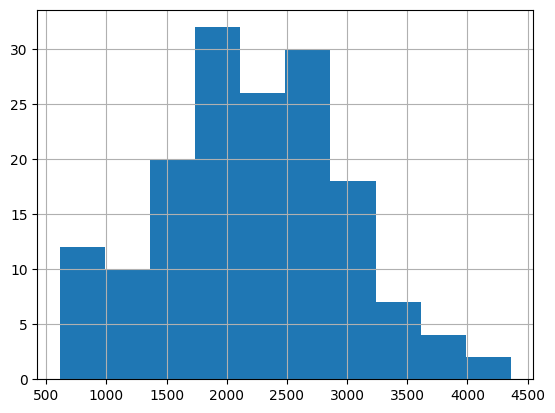

In [7]:
Cellphone['Price'].hist()

The distribution of the target variable is sufficient

# 4. Data exploration at basic level

In [8]:
#sample rows of data
Cellphone.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [9]:
#sample rows of data
Cellphone.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [10]:
# summarised data information
Cellphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [11]:
# Descriptive statstics
Cellphone.describe(include='all')


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [12]:
#finding unique values for each column
Cellphone.nunique()

,0
Product_id,83
Price,81
Sale,125
weight,62
resoloution,24
ppi,45
cpu core,6
cpu freq,28
internal mem,10
ram,12


Observation from Basic Exploratory Data Analysis


*   Product_id - Continuous
*   Price - Continuous
*   Sale - Continuous
*   weight - Continuous
*   Resoloution - Continuous
*   ppi - Continuous
*   cpu core - Categorical
*   cpu freq - Continuous
*   internal mem - Categorical
*   ram - Categorical
*   RearCam - Categorical
*   Front_Cam - Categorical
*   Battery - Continuous
*   thickness - Continuous



















# 5. Visual Exploratory Data Analysis (EDA) of data

Categorical predictor:

*   cpu core
*   internal mem
*   ram
*   RearCam
*   Front_Cam








In [13]:
# plotting bar chart for categorical predictors

def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt

  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


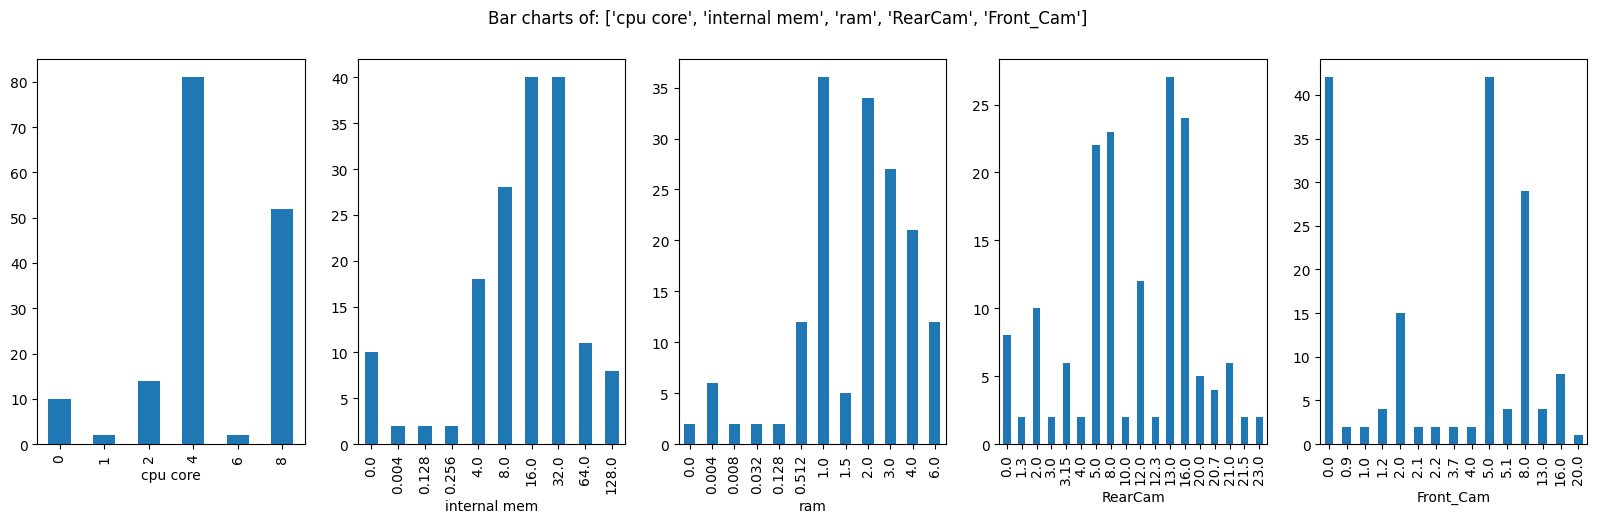

In [14]:
#calling the function
PlotBarCharts(inpData=Cellphone, colsToPlot=['cpu core', 'internal mem', 'ram', 'RearCam', 'Front_Cam'])

* cpu core - it shows a slight negative skew but is relatively normal
* Internal mem - it shows a slight negative skew but is relatively normal
* ram - it shows a slight negative skew but is relatively normal
* RearCam - is relatively normally distributed, possibly bimodal   
* Front Cam - there is a large number of observation front cam 0 and 5

All predictor are selected

Continuous predictor
*   Product_id
*   Price
*   Sale
*   weight
*   Resoloution
*   ppi
*   cpu freq
*   Battery
*   thickness



array([[<Axes: title={'center': 'Product_id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Sale'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'resoloution'}>,
        <Axes: title={'center': 'ppi'}>],
       [<Axes: title={'center': 'cpu freq'}>,
        <Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'thickness'}>]], dtype=object)

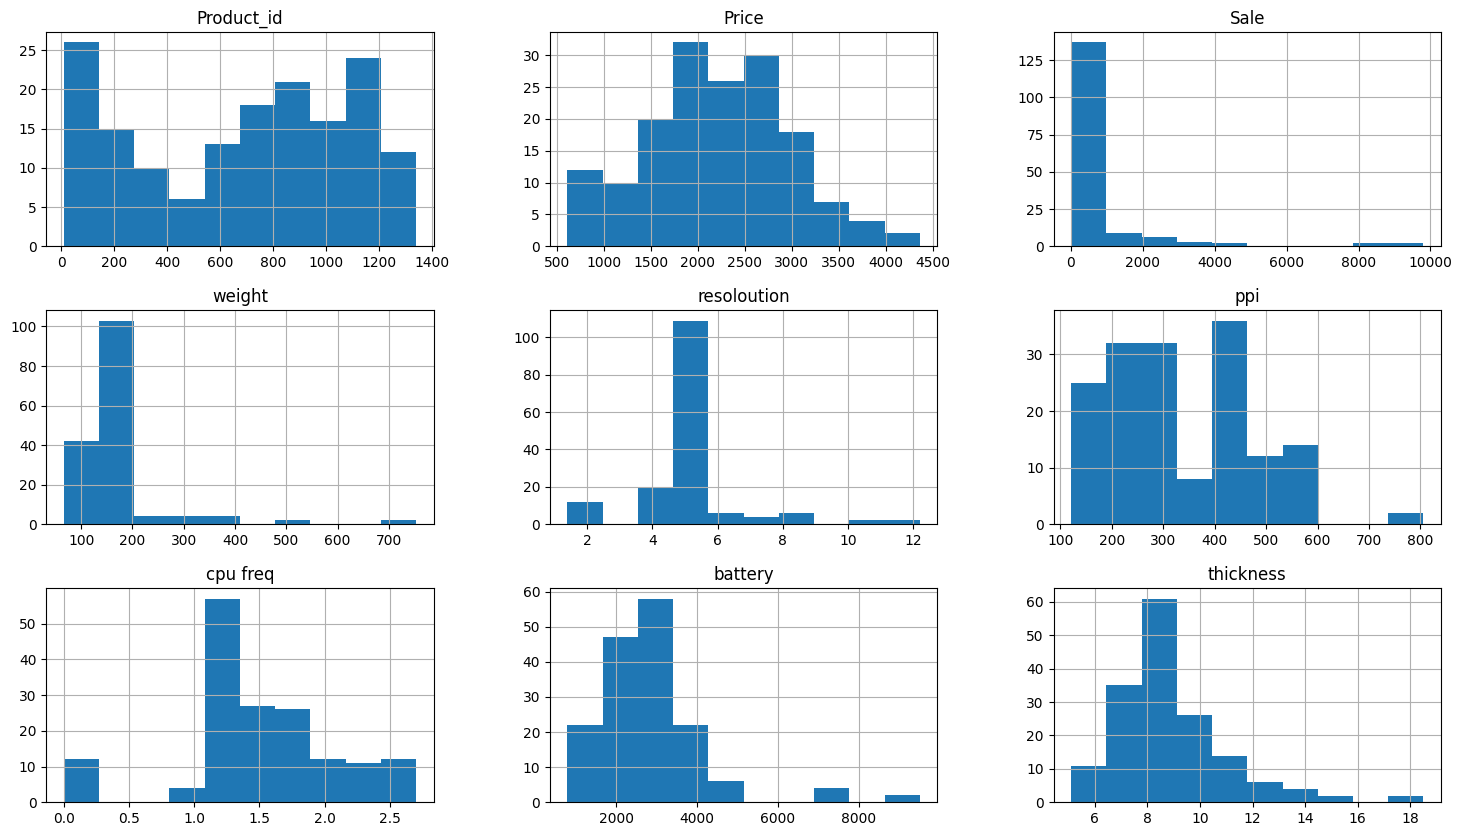

In [15]:
# plotting histogram for continuous predictor

Cellphone.hist(['Product_id','Price','Sale','weight','resoloution', 'ppi','cpu freq','battery','thickness'], figsize=(18,10))

Obersavtions

*   Product_id - Distrubtion is good
*   Price - Distribution is good
*   Sale  - Outlier is any above 5261.33, analysis is needed
*   weight - Outlier is anything above 371.56, analysis is needed
*   Resoloution - Outlier is anything above 9.74, analysis is needed
*   ppi - Distrubtion is good
*   cpu freq - Distrubtion is good
*   Battery - Outlier is anything above 6943.08, analysis is needed
*   thickness - Outlier is anything above 15.49, analysis is needed

# 6. Outlier analysis

Outlier anayliss is need for these vaules:

*   Sale  
*   weight
*   Resoloution
*   Battery
*   thickness


In [16]:
# replacing the outliers for 'Sale'
#anything above 5262 is an outlier
Cellphone['Sale'][Cellphone['Sale']<5262].sort_values(ascending=False)

,Sale
156,4638
155,4408
154,3619
153,3291
152,3248
...,...
4,11
3,11
2,10
1,10


In [17]:
#replacing outliers with the nearest vaule
Cellphone['Sale'][Cellphone['Sale']>5262]=4638

<ipython-input-17-07fedc07fa60>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Cellphone['Sale'][Cellphone['Sale']>5262]=4638
<ipython-input-17-07fedc07fa60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

array([[<Axes: title={'center': 'Sale'}>]], dtype=object)

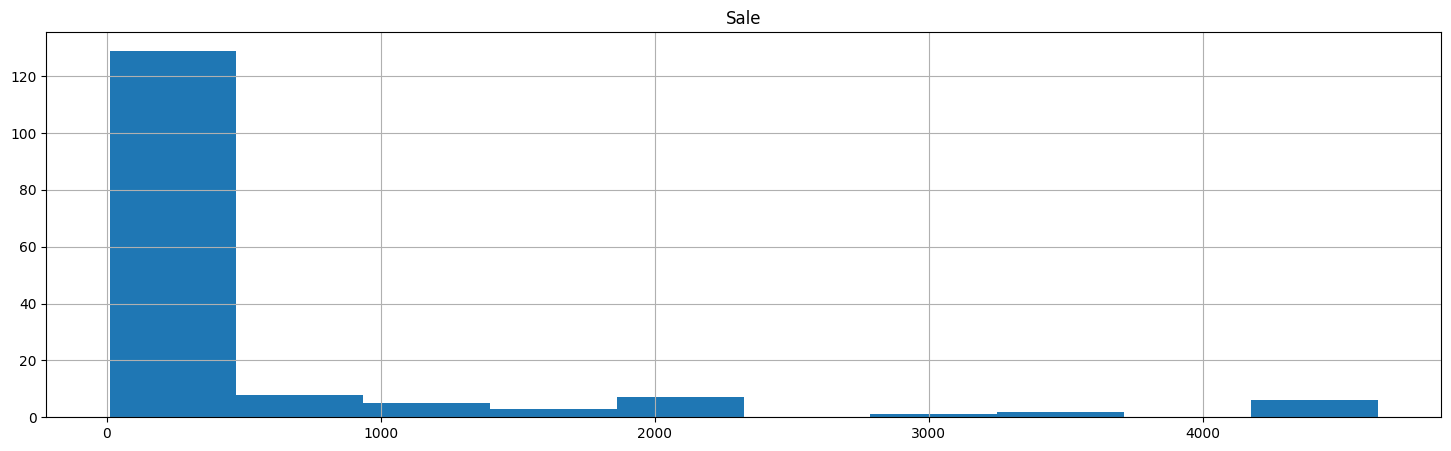

In [18]:
Cellphone.hist(['Sale'], figsize=(18,5))

In [19]:
# replacing the outliers for 'weight'
#anything above 372 is an outlier
Cellphone['weight'][Cellphone['weight']<372].sort_values(ascending=False)

,weight
67,310.0
72,310.0
77,279.0
85,279.0
62,260.0
...,...
110,77.9
149,69.8
150,69.8
86,66.0


In [20]:
#replacing outliers with the nearest vaule
Cellphone['weight'][Cellphone['weight']>372]=310

<ipython-input-20-9aeb860dbbd0>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Cellphone['weight'][Cellphone['weight']>372]=310
<ipython-input-20-9aeb860dbbd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

array([[<Axes: title={'center': 'weight'}>]], dtype=object)

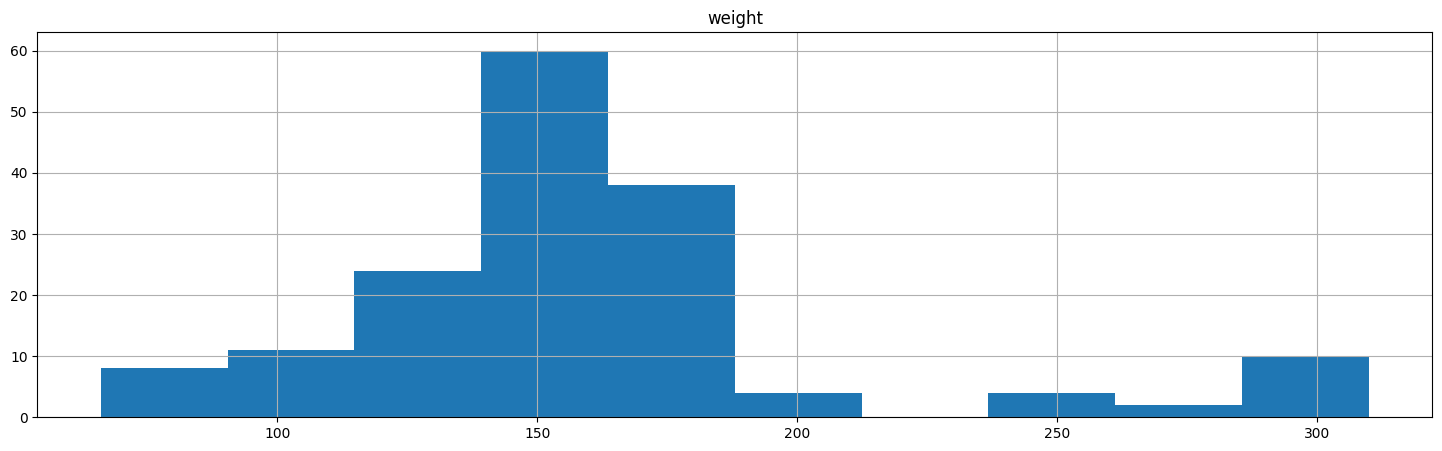

In [21]:
Cellphone.hist(['weight'], figsize=(18,5))

In [22]:
# replacing the outliers for 'Resoloution '
#anything above 10 is an outlier
Cellphone['resoloution'][Cellphone['resoloution']<10].sort_values(ascending=False)

,resoloution
84,8.0
90,8.0
72,8.0
93,8.0
95,8.0
...,...
140,2.2
86,1.5
81,1.5
149,1.4


In [23]:
#replacing outliers with the nearest vaule
Cellphone['resoloution'][Cellphone['resoloution']>10]=8

<ipython-input-23-f6867f3e6759>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Cellphone['resoloution'][Cellphone['resoloution']>10]=8
<ipython-input-23-f6867f3e6759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

array([[<Axes: title={'center': 'resoloution'}>]], dtype=object)

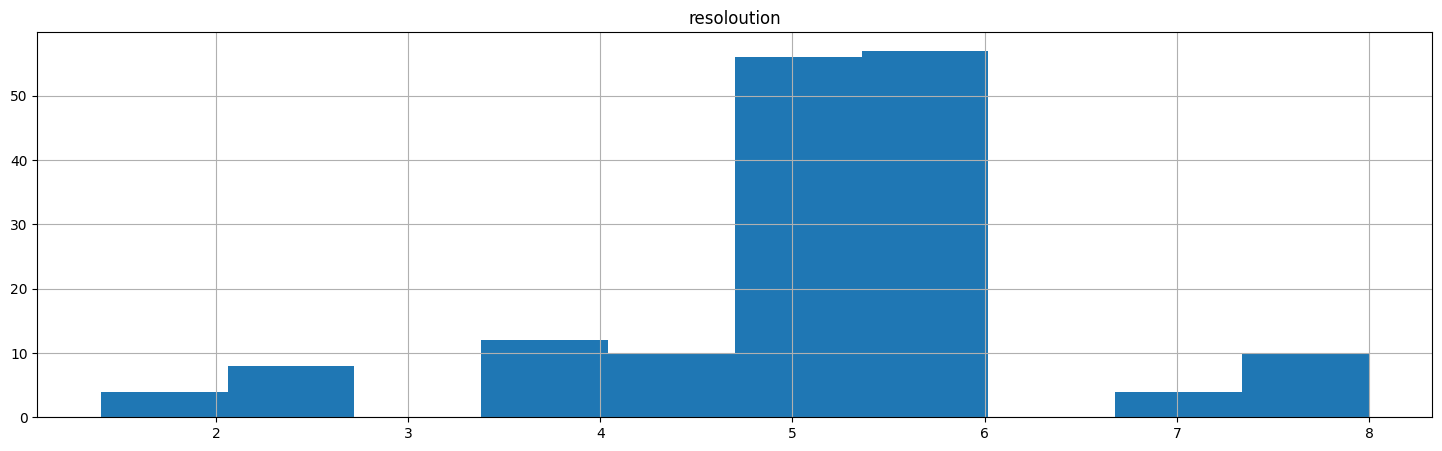

In [24]:
Cellphone.hist(['resoloution'], figsize=(18,5))

In [25]:
# replacing the outliers for 'Battery'
#anything above 6944 is an outlier
Cellphone['battery'][Cellphone['battery']<6944].sort_values(ascending=False)

,battery
117,5000
116,5000
84,4500
90,4500
93,4450
...,...
113,850
150,800
149,800
86,800


In [26]:
#replacing outliers with the nearest vaule
Cellphone['battery'][Cellphone['battery']>6944]=5000

<ipython-input-26-6af6a9dd7afe>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Cellphone['battery'][Cellphone['battery']>6944]=5000
<ipython-input-26-6af6a9dd7afe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

array([[<Axes: title={'center': 'battery'}>]], dtype=object)

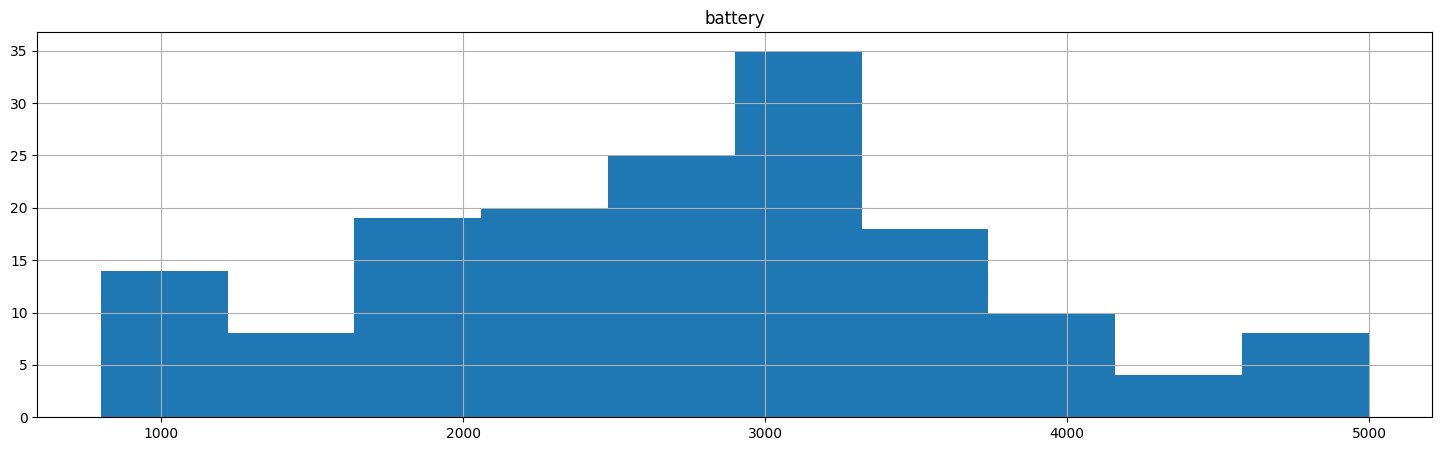

In [27]:
Cellphone.hist(['battery'], figsize=(18,5))

In [28]:
# replacing the outliers for 'thickness '
#anything above 16 is an outlier
Cellphone['thickness'][Cellphone['thickness']<16].sort_values(ascending=False)

,thickness
125,15.6
126,15.6
149,14.1
150,14.1
86,13.2
...,...
78,5.1
76,5.1
63,5.1
69,5.1


In [29]:
#replacing outliers with the nearest vaule
Cellphone['thickness'][Cellphone['thickness']>16]=15.6

<ipython-input-29-0305965adc59>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Cellphone['thickness'][Cellphone['thickness']>16]=15.6
<ipython-input-29-0305965adc59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

array([[<Axes: title={'center': 'thickness'}>]], dtype=object)

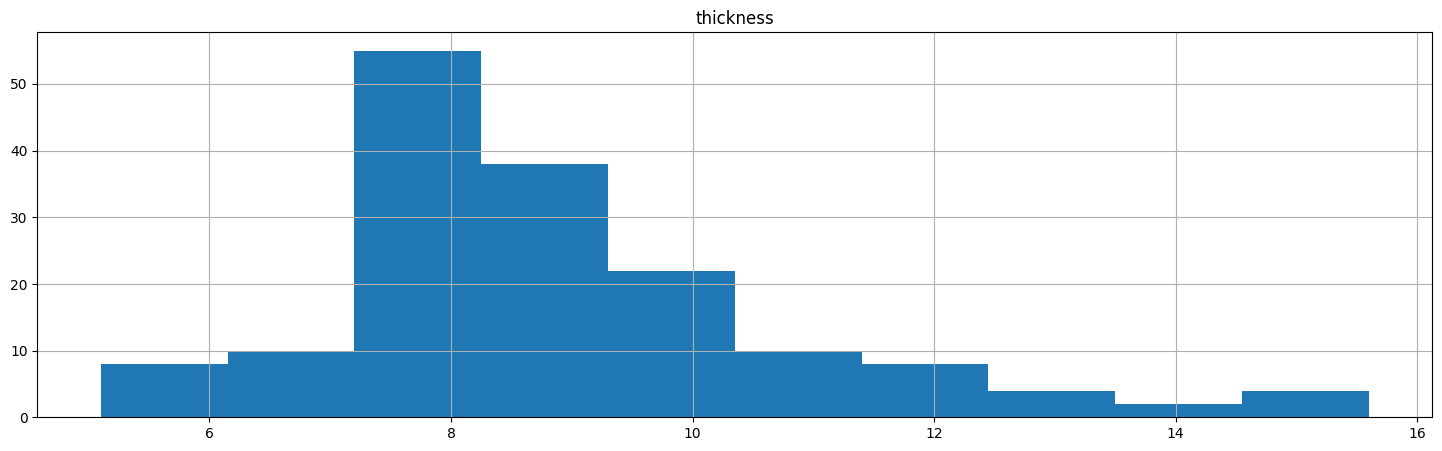

In [30]:
Cellphone.hist(['thickness'], figsize=(18,5))

All outliers have been removed and the distribution of all the predictors is good.

# 7. Missing values analysis

In [31]:
# Finding if there are any missing values in each column
Cellphone.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


Observation
*  There are no missing values
*  No removal is need

# 8. Feature selection

Continuous Vs Continuous - Scatter plot

Target variable - Price

Continuous predictor
*   Product_id
*   Sale
*   weight
*   Resoloution
*   ppi
*   cpu freq
*   Battery
*   thickness


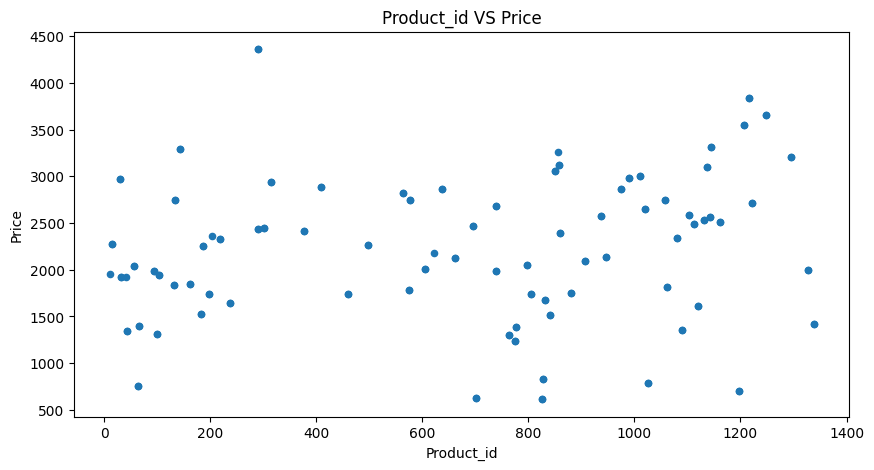

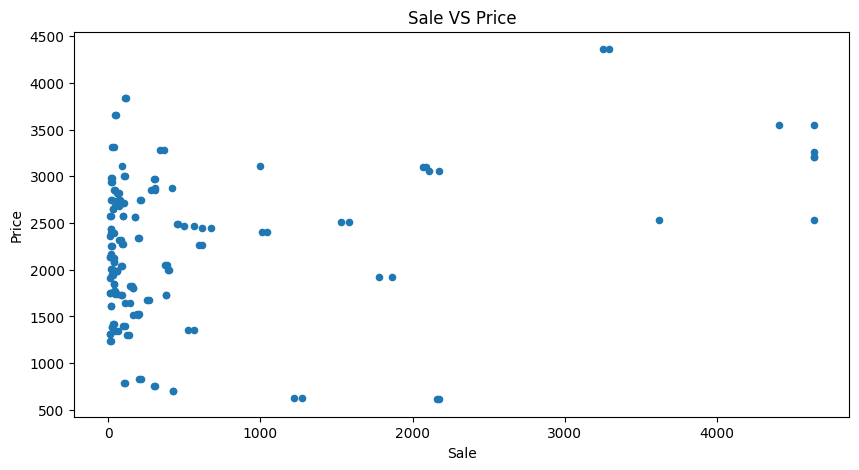

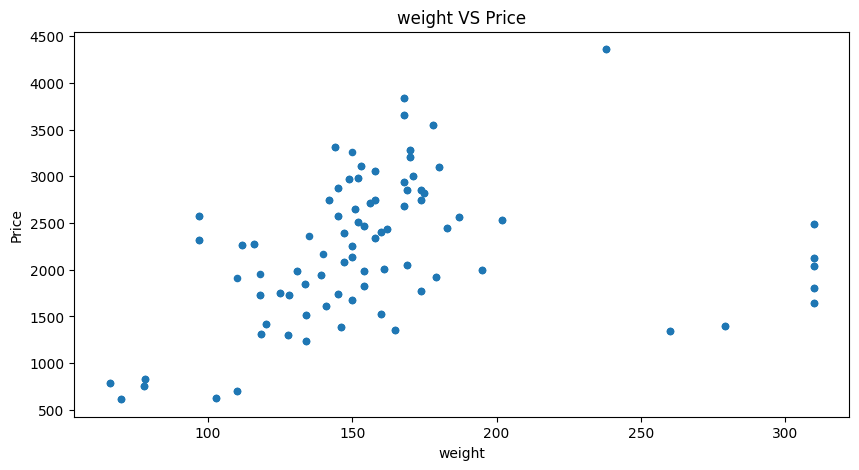

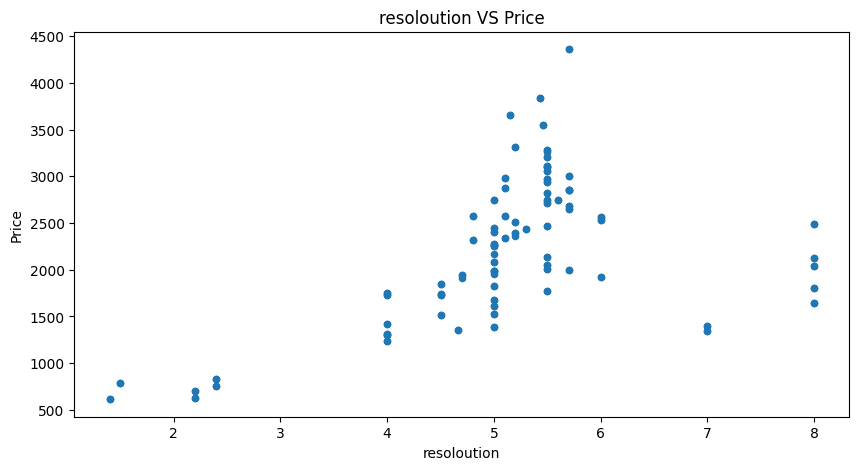

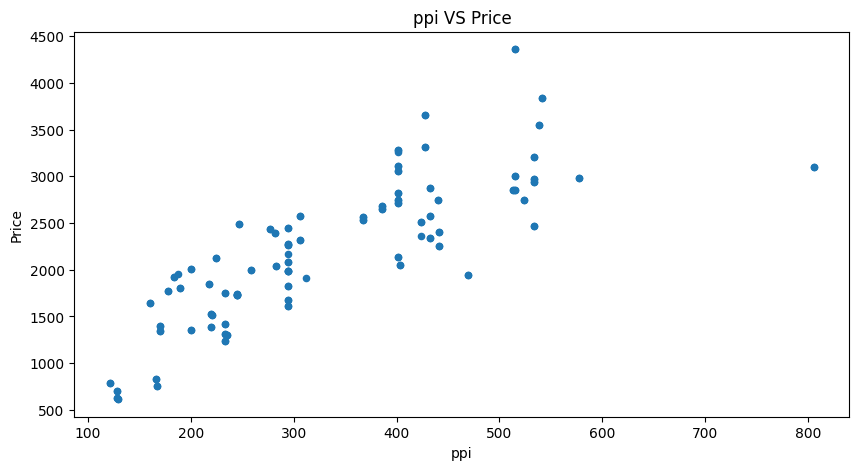

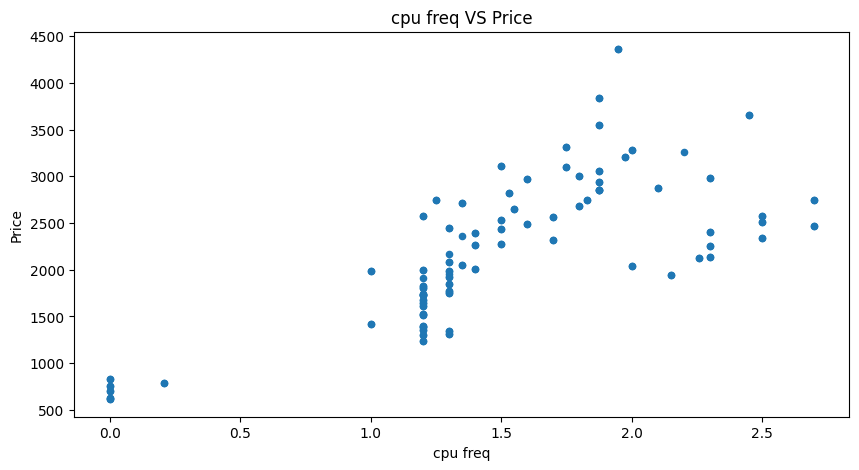

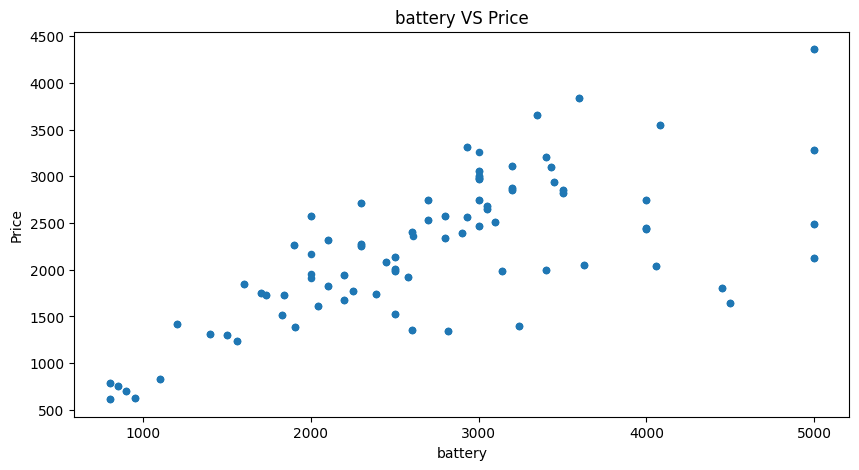

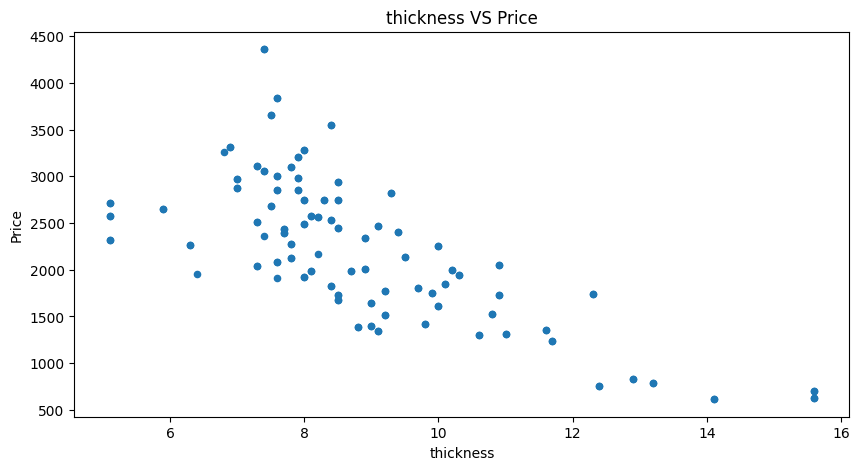

In [32]:
ContinousCols = ['Product_id','Sale','weight','resoloution', 'ppi','cpu freq','battery','thickness']

#plotting the graphs for continuous predictor vs Pirce

for predictor in ContinousCols:
  Cellphone.plot.scatter(x=predictor, y ='Price', figsize=(10,5), title= predictor+" VS "+"Price")

Continuous Vs Continuous - Correlation value
target value - price
Continuous predictor
*   Product_id - there is no clear trend but further analysis may be relevent  
*   Sale - there is no clear trend but further analysis may be relevent
*   weight- there is no clear trend but further analysis may be relevent
*   Resoloution - there is no clear trend but further analysis may be relevent
*   ppi - this is showing an increasing trend in indicate a possible correlation
*   cpu freq- this is showing an increasing trend in indicate a possible correlation
*   Battery - this is showing an increasing trend in indicate a possible correlation
*   thickness - this is showing a decreasing trend in indicate a possible correlation




In [33]:
# calucating using correlation matrix
ContinousCols = ['Price','Product_id','Sale','weight','resoloution', 'ppi','cpu freq','battery','thickness']

#creating the matrix
CorrelationData=Cellphone[ContinousCols].corr()
CorrelationData


,Price,Product_id,Sale,weight,resoloution,ppi,cpu freq,battery,thickness
Price,1.000000,0.165136,0.302110,0.253073,0.476049,0.817614,0.727383,0.678655,-0.728842
Product_id,0.165136,1.000000,0.211649,-0.042378,-0.065525,0.207271,0.092428,0.008088,0.041410
Sale,0.302110,0.211649,1.000000,0.076201,0.006833,0.265335,0.082790,0.171615,-0.032154
weight,0.253073,-0.042378,0.076201,1.000000,0.884617,0.058404,0.348618,0.777551,-0.271572
resoloution,0.476049,-0.065525,0.006833,0.884617,1.000000,0.264040,0.577951,0.808685,-0.617387
ppi,0.817614,0.207271,0.265335,0.058404,0.264040,1.000000,0.713168,0.441375,-0.503332
cpu freq,0.727383,0.092428,0.082790,0.348618,0.577951,0.713168,1.000000,0.580828,-0.611848
battery,0.678655,0.008088,0.171615,0.777551,0.808685,0.441375,0.580828,1.000000,-0.510449
thickness,-0.728842,0.041410,-0.032154,-0.271572,-0.617387,-0.503332,-0.611848,-0.510449,1.000000


In [34]:
#finding the columns where correlation is >0.5 with Price
CorrelationData['Price'][abs(CorrelationData['Price'])>0.5]

,Price
Price,1.000000
ppi,0.817614
cpu freq,0.727383
battery,0.678655
thickness,-0.728842


Final continuous columns that are selected are:


*   ppi
*   cpu freq
*   battery
*   thickness



# 9. Statistical feature selection (categorical vs. continuous) using ANOVA test

Categorical VS Continuous - Box Plots

target varible: Price

Categorical varibles:
*   cpu core
*   internal mem
*   ram
*   RearCam
*   Front_Cam


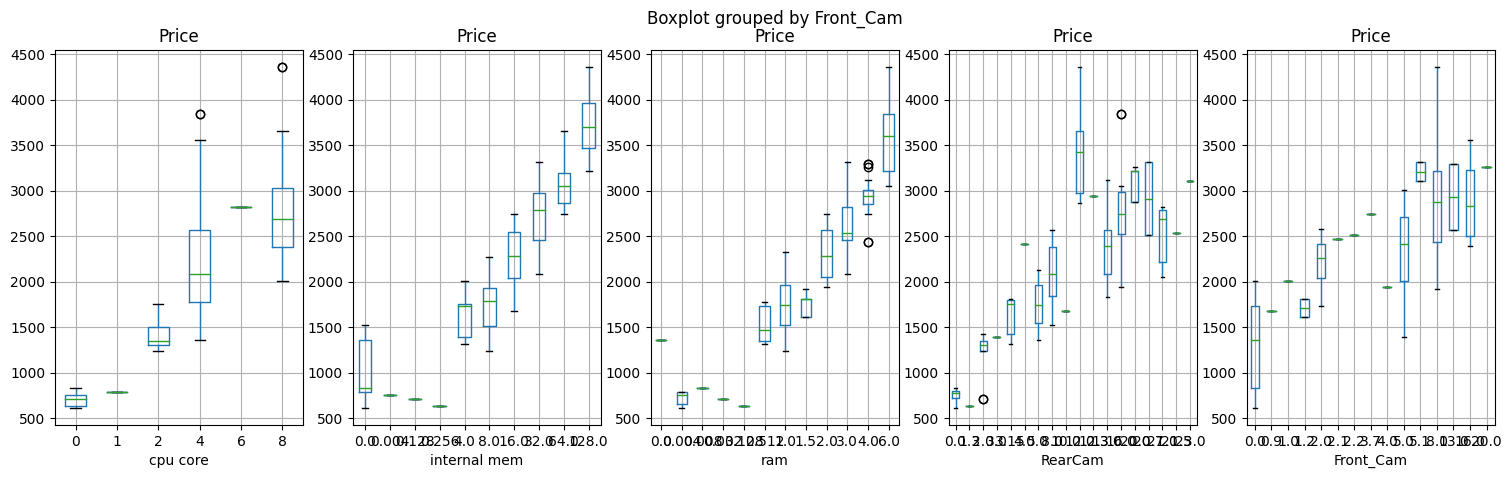

In [35]:
#box plot for categorical predictors vs Price
CategoricalColsList=['cpu core','internal mem','ram','RearCam','Front_Cam']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

#creating the box plots
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  Cellphone.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

*   cpu core - boxes are not in the same line, therefore possible correlation
*   internal mem - boxes are not in the same line, therefore possible correlation
*   ram - boxes are not in the same line, therefore possible correlation
*   RearCam - boxes are not in the same line, therefore possible correlation
*   Front_Cam- boxes are not in the same line, therefore possible correlation

This can be confirmed with the ANOVA test below


Categorical VS continuous - ANOVA test


In [36]:
#defining function to find statical relationship
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  #cretaing empty list
  SelectedPredictors=[]

  print('ANVOA Results\n')
  for predictor in CategoricalPredictorList:
    CategoryGroupList=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupList)

    #if the Anova p-vaule is greater than 0.05, that mean we reject
    if (AnovaResults[1] < 0.05 ):
      print(predictor, 'is correlated with', TargetVariable, '|P-vaule:', AnovaResults[1])
    else:
      print(predictor, 'is not correlated with', TargetVariable, '|P-Value:', AnovaResults[1])
  return(SelectedPredictors)


In [37]:
#calling the function
CategoricalPredictorList=['cpu core','internal mem','ram','RearCam','Front_Cam']
FunctionAnova(inpData=Cellphone, TargetVariable='Price', CategoricalPredictorList=CategoricalPredictorList)

ANVOA Results

cpu core is correlated with Price |P-vaule: 3.721669566887769e-25
internal mem is correlated with Price |P-vaule: 5.612710293590637e-57
ram is correlated with Price |P-vaule: 1.5941027123567347e-60
RearCam is correlated with Price |P-vaule: 4.810966235170514e-43
Front_Cam is correlated with Price |P-vaule: 2.370649577763112e-28


[]

Observations:
*  Result confirm that our analysis from the boxplot above
*  All categorical predictors are related to price
*  Selected Predictor are: cpu core, internal mem, ram, RearCam, Front_Cam


# 10. Selecting final predictors/features for building machine learning/AI model

Based on tests, we can select the final columns for our model as:
*   cpu core
*   internal mem
*   ram
*   RearCam
*   Front_Cam
*   ppi
*   cpu freq
*   battery
*   thickness

In [38]:
SelectedColumn=['cpu core', 'internal mem', 'ram','RearCam','Front_Cam','ppi','cpu freq','battery', 'thickness']

DataForML=Cellphone[SelectedColumn]
DataForML.head()

,cpu core,internal mem,ram,RearCam,Front_Cam,ppi,cpu freq,battery,thickness
0,8,16.0,3.000,13.00,8.0,424,1.35,2610,7.4
1,2,4.0,1.000,3.15,0.0,233,1.30,1700,9.9
2,4,8.0,1.500,13.00,5.0,312,1.20,2000,7.6
3,2,4.0,0.512,3.15,0.0,233,1.30,1400,11.0
4,2,4.0,1.000,3.15,0.0,233,1.30,1700,9.9


# 11. Data conversion to numeric values for machine learning/predictive analysis

In [39]:
#converting nomial vaules to numeric
#treating all nominal variables
DataForML_Numeric=pd.get_dummies(DataForML)

#adding price to data
DataForML_Numeric['Price']=Cellphone['Price']

#printing sample
DataForML_Numeric.head()

,cpu core,internal mem,ram,RearCam,Front_Cam,ppi,cpu freq,battery,thickness,Price
0,8,16.0,3.000,13.00,8.0,424,1.35,2610,7.4,2357
1,2,4.0,1.000,3.15,0.0,233,1.30,1700,9.9,1749
2,4,8.0,1.500,13.00,5.0,312,1.20,2000,7.6,1916
3,2,4.0,0.512,3.15,0.0,233,1.30,1400,11.0,1315
4,2,4.0,1.000,3.15,0.0,233,1.30,1700,9.9,1749


# 12. Train/test data split and standardisation/normalisation of data

In [40]:
# print column names
DataForML_Numeric.columns

Index(['cpu core', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'ppi',
       'cpu freq', 'battery', 'thickness', 'Price'],
      dtype='object')

Training and testing data split

In [41]:
#seperating predictor variables and target
TargetVaribale = 'Price'
Predictors=['cpu core', 'internal mem', 'ram','RearCam','Front_Cam','ppi','cpu freq','battery', 'thickness']

X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVaribale].values

#spliting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=428)

Standardisation of the data

# 13. Investigating multiple regression algorithms

Chossen regression algorithms:


1.   Linear Regression
2.   decision tree regressor
3.   adaboost regressor
4.   SVM regressor
5.   XGBoost regressor





Linear regression

In [42]:

from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

#printing parameters
print(RegModel)

#creating model for training data
LREG=RegModel.fit(X_train, Y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
print('R2 Value:', metrics.r2_score(Y_train, LREG.predict(X_train)))

print('\n Model Validation and Accurcay Calcuations')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVaribale]=Y_test
TestingDataResults[('Predicted'+TargetVaribale)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100*((abs(TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean Accurcay on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_score(orig,pred):
  MAPE = np.mean(100*(np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy valiues for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9424070045975095

 Model Validation and Accurcay Calcuations
   cpu core  internal mem  ram  RearCam  Front_Cam    ppi  cpu freq  battery  \
0       4.0           8.0  1.0      5.0        0.0  218.0     1.300   1600.0   
1       8.0          16.0  1.0      8.0        5.0  306.0     1.700   2100.0   
2       8.0           8.0  1.0      8.0        8.0  294.0     1.400   1900.0   
3       4.0          64.0  6.0     16.0        8.0  401.0     1.875   3000.0   
4       8.0          32.0  3.0     23.0        5.1  806.0     1.750   3430.0   

   thickness  Price  PredictedPrice  
0       10.1   1843          1625.0  
1        5.1   2323          2462.0  
2        6.3   2266          2286.0  
3        7.4   3055          3121.0  
4        7.8   3102          3218.0  
Mean Accurcay on test data: 91.84689904362214
Median Accuracy on test data: 93.29243353783231

Accuracy valiues for 10-fold Cross Validation:
 [91.9950854  89.86444162 92.47988998 92.93036736 92.1280

Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9661059889262811

 Model Validation and Accuracy Calculation
   cpu core  internal mem  ram  RearCam  Front_Cam    ppi  cpu freq  battery  \
0       4.0           8.0  1.0      5.0        0.0  218.0     1.300   1600.0   
1       8.0          16.0  1.0      8.0        5.0  306.0     1.700   2100.0   
2       8.0           8.0  1.0      8.0        8.0  294.0     1.400   1900.0   
3       4.0          64.0  6.0     16.0        8.0  401.0     1.875   3000.0   
4       8.0          32.0  3.0     23.0        5.1  806.0     1.750   3430.0   

   thickness  Price  PredictedPrice  
0       10.1   1843          1638.0  
1        5.1   2323          2266.0  
2        6.3   2266          2266.0  
3        7.4   3055          3159.0  
4        7.8   3102          2732.0  
mean Accuracy on test data 91.87601166550184
median Accuracy on test data 93.29243353783231

 Accuracy vaules for 10 fold Cross Validation:
 [87.58101971 92.

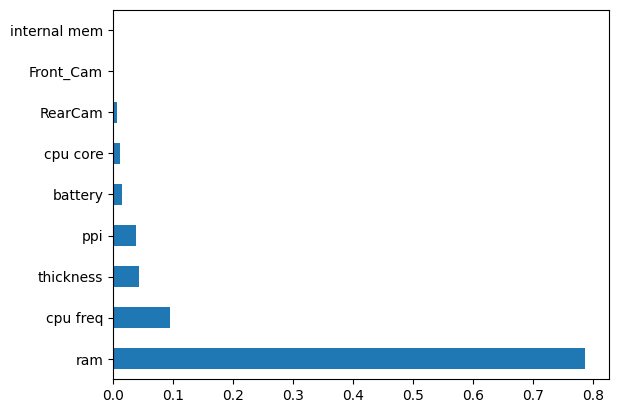

In [43]:
from ast import increment_lineno
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')

print(RegModel)

DT=RegModel.fit(X_train, Y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print('R2 Value:', metrics.r2_score(Y_train, DT.predict(X_train)))

%matplotlib inline
feature_importances=pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print("\n Model Validation and Accuracy Calculation")

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVaribale]=Y_test
TestingDataResults[("Predicted"+TargetVaribale)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100*((abs(TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100-MAPE
MedianMAPE= 100 - MedianMAPE
print('mean Accuracy on test data', Accuracy)
print('median Accuracy on test data', MedianAccuracy)

def Accuracy_score(orig,pred):
  MAPE = np.mean(100*(np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_score, greater_is_better=True)


from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\n Accuracy vaules for 10 fold Cross Validation:\n', Accuracy_Values)
print('\Final Avergae Accurcay of model:', round(Accuracy_Values.mean(),2))




In [44]:
TargetVaribale = ['Price']

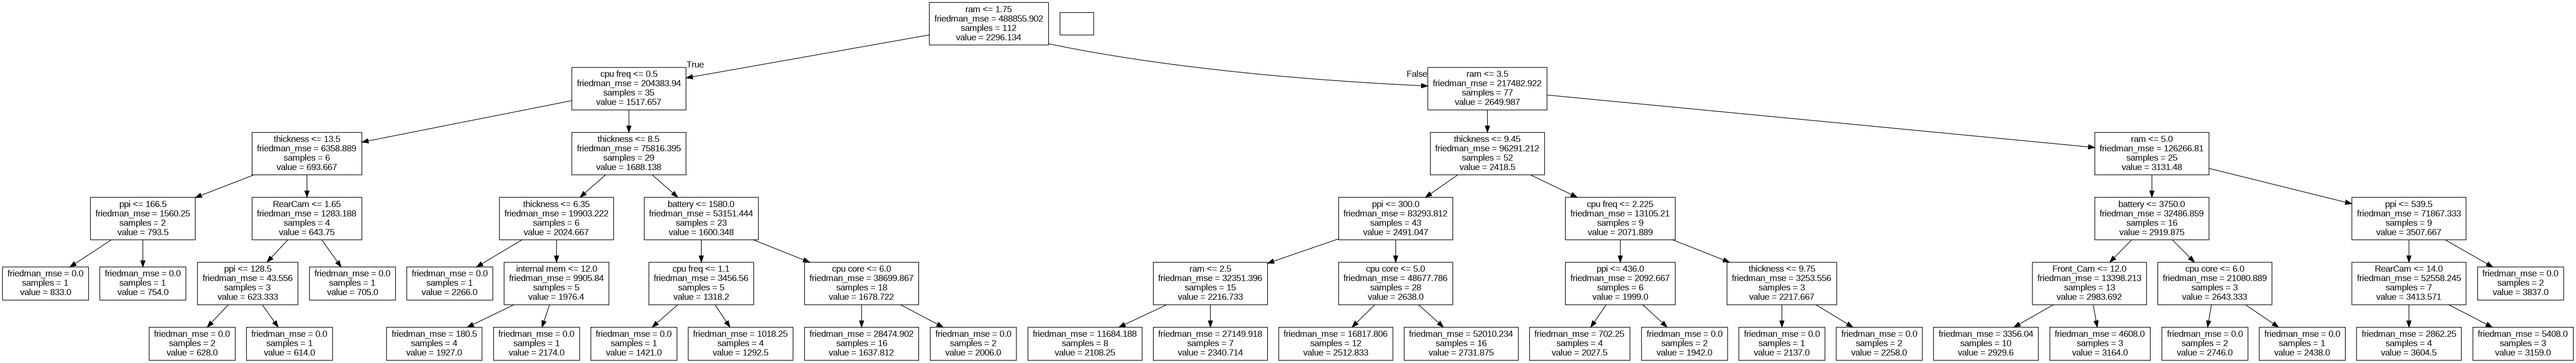

In [45]:
from IPython.display import Image
from sklearn import tree
import pydotplus



dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVaribale)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width=200, height=2000)

In [46]:
TargetVaribale = 'Price'

adaboost regressor

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.951302059770937

 Model validation and Accuray Calculations
   cpu core  internal mem  ram  RearCam  Front_Cam    ppi  cpu freq  battery  \
0       4.0           8.0  1.0      5.0        0.0  218.0     1.300   1600.0   
1       8.0          16.0  1.0      8.0        5.0  306.0     1.700   2100.0   
2       8.0           8.0  1.0      8.0        8.0  294.0     1.400   1900.0   
3       4.0          64.0  6.0     16.0        8.0  401.0     1.875   3000.0   
4       8.0          32.0  3.0     23.0        5.1  806.0     1.750   3430.0   

   thickness  Price  PredictedPrice  
0       10.1   1843          1657.0  
1        5.1   2323          2227.0  
2        6.3   2266          2083.0  
3        7.4   3055          3379.0  
4        7.8   3102          2828.0  
mean Accuracy on test data 91.07591290184533
median Accuracy on test data 93.29243353783231

 Accur

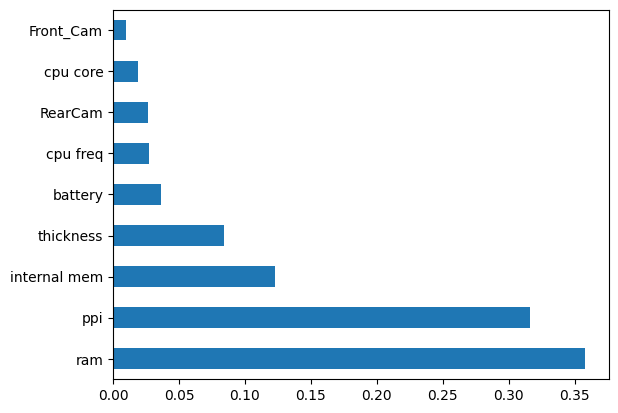

In [47]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

TargetVaribale='Price'

DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, estimator=DTR ,learning_rate=0.04)

print(RegModel)

AB=RegModel.fit(X_train, Y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print('R2 Value:', metrics.r2_score(Y_train, AB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


print('\n Model validation and Accuray Calculations')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVaribale]=Y_test
TestingDataResults[('Predicted'+TargetVaribale)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100*((abs(TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100-MAPE
MedianMAPE= 100 - MedianMAPE
print('mean Accuracy on test data', Accuracy)
print('median Accuracy on test data', MedianAccuracy)

def Accuracy_score(orig,pred):
  MAPE = np.mean(100*(np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_score, greater_is_better=True)


from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\n Accuracy vaules for 10 fold Cross Validation:\n', Accuracy_Values)
print('\Final Avergae Accurcay of model:', round(Accuracy_Values.mean(),2))



SVM regressor

In [48]:
from sklearn import svm
RegModel=svm.SVR(C=50, kernel='rbf', gamma=0.01)

print(RegModel)

SVM=RegModel.fit(X_train, Y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print('R2 Value:', metrics.r2_score(Y_train, SVM.predict(X_train)))

%matplotlib inline

print('\n Model Validation and Accuracy')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVaribale]=Y_test
TestingDataResults[('Predicted'+TargetVaribale)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100*((abs(TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100-MAPE
MedianMAPE= 100 - MedianMAPE
print('mean Accuracy on test data', Accuracy)
print('median Accuracy on test data', MedianAccuracy)

def Accuracy_score(orig,pred):
  MAPE = np.mean(100*(np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_score, greater_is_better=True)


from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\n Accuracy vaules for 10 fold Cross Validation:\n', Accuracy_Values)
print('\Final Avergae Accurcay of model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.17401475805339783

 Model Validation and Accuracy
   cpu core  internal mem  ram  RearCam  Front_Cam    ppi  cpu freq  battery  \
0       4.0           8.0  1.0      5.0        0.0  218.0     1.300   1600.0   
1       8.0          16.0  1.0      8.0        5.0  306.0     1.700   2100.0   
2       8.0           8.0  1.0      8.0        8.0  294.0     1.400   1900.0   
3       4.0          64.0  6.0     16.0        8.0  401.0     1.875   3000.0   
4       8.0          32.0  3.0     23.0        5.1  806.0     1.750   3430.0   

   thickness  Price  PredictedPrice  
0       10.1   1843          2284.0  
1        5.1   2323          2334.0  
2        6.3   2266          2284.0  
3        7.4   3055          2393.0  
4        7.8   3102          2384.0  
mean Accuracy on test data 46.05933102796902
median Accuracy on test data 93.29243353783231

 Accuracy vaules for 10 fold Cross Validation:
 [75.49323561 73.91493091 79.93802397 74.66396859 81.57144315 42.94

XGBoost regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:01:57] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.9999686479568481

 Model Validation and Accurcay Calcuations
   cpu core  internal mem  ram  RearCam  Front_Cam    ppi  cpu freq  battery  \
0       4.0           8.0  1.0      5.0        0.0  218.0     1.300   1600.0   
1       8.0          16.0  1.0      8.0        5.0  306.0     1.700   2100.0   
2       8.0           8.0  1.0      8.0        8.0  294.0     1.400   1900.0   
3       4.0          64.0  6.0     16.0        8.0  401.0     1.875   3000.0   
4       8.0          32.0  3.0     23.0        5.1  806.0     1.750   3430.0   

   thickness  Price  PredictedPrice  
0       10.1   1843          1839.0  
1        5.1   2323          2516.0  
2        6.3   2266          2266.0  
3        7.4   3055          3056.0  
4        7.8   3102          3105.0  
Mean Accurcay on test data: 93.54241408088569
Median Accuracy on test data: 99.57364341085271


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:01:57] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:01:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy valiues for 10-fold Cross Validation:
 [93.29007302 95.49810192 93.03066411 90.76431608 95.37684457 94.00249334
 92.74815431 91.53869068 92.03911346 89.31667551]

Final Average Accuracy of the model 92.76


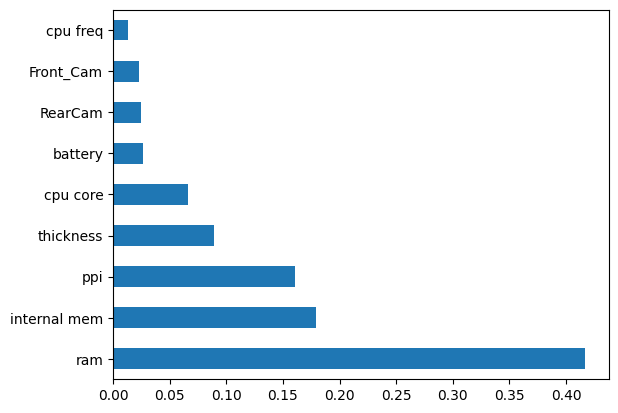

In [49]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear',booster='gbtree')

print(RegModel)

XGB=RegModel.fit(X_train, Y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train, XGB.predict(X_train)))

%matplotlib inline
feature_importances=pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n Model Validation and Accurcay Calcuations')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVaribale]=Y_test
TestingDataResults[('Predicted'+TargetVaribale)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100*((abs(TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean Accurcay on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_score(orig,pred):
  MAPE = np.mean(100*(np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy valiues for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model', round(Accuracy_Values.mean(),2))


<Axes: >

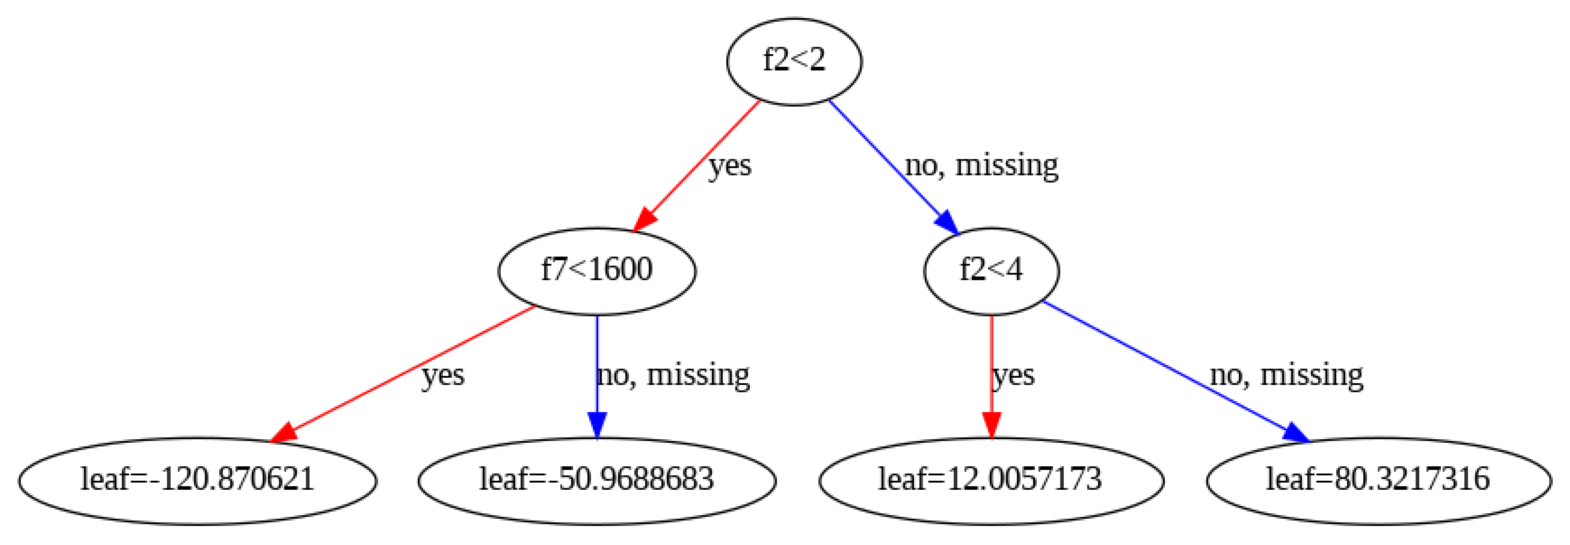

In [50]:
#plotting single tree decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))
plot_tree(XGB, num_tree=10, ax=ax)

The final accuracy of the prediction model were:
* Linear - 92.59
* Decision tree - 89.83
* AdaBoost - 90.04
* SVM - 61.75
* XGboost - 90.08

The R2 vaule of the prediction model were:
* Linear - 0.94
* Decision tree - 0.97
* AdaBoost - 0.95
* SVM - 0.17
* XGboost - 0.95

The Mean Accuaracy of the prediction model were:
* Linear - 91.85
* Decision tree - 90.22
* AdaBoost - 90.63
* SVM - 46.05
* XGboost - 93.54



# 14. Selection of the best model

Linear regressor product the best score of accuracy at 92.59

Final predictors are: ram, thickness, ppi, internal mem. These are the top variable on importance charts.

# 15. Deployment of the best model in production

In [51]:
TargetVariable='Price'

Predictors=['internal mem', 'ram','ppi','thickness']

X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVariable].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(Y.shape)

(161, 4)
(161,)


Cross validating the final model accuracy with less predictor

In [52]:
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy valiues for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model', round(Accuracy_Values.mean(),2))


Accuracy valiues for 10-fold Cross Validation:
 [91.99317612 90.33360232 90.94570535 90.91578665 94.95613109 92.36512781
 89.69498219 87.72448835 92.80518418 89.0462357 ]

Final Average Accuracy of the model 91.08


Retraining the final model using 100% data


In [53]:
Final_LR_Model=RegModel.fit(X,Y)

Save the model as a serialized file

In [54]:
import pickle
import os

with open('Final_LR_Model.pkl', 'wb') as fileWriteStream:
  pickle.dump(Final_LR_Model, fileWriteStream)
  fileWriteStream.close()


with open('DataForML.pkl', 'wb') as fileWriteStream:
  pickle.dump(DataForML, fileWriteStream)
  fileWriteStream.close()




print('pickle file of Predicitv model is saved:', os.getcwd())

pickle file of Predicitv model is saved: /content/drive/MyDrive/Assigment


Creating the python function

In [55]:
from re import IGNORECASE

def FunctionPredictResult(InputData):
  import pandas as pd
  Num_Inputs=InputData.shape[0]

  #DataForML=pd.open_pickle('DataForML.pkl')

  DataForML=pd.read_pickle('DataForML.pkl')

  InputData= pd.concat([InputData, DataForML], ignore_index=True)

  InputData=pd.get_dummies(InputData)

  Predictors=['internal mem', 'ram','ppi','thickness']

  X=InputData[Predictors].values[0:Num_Inputs]

  X = PredictorScalerFit.transform(X)

  import pickle
  with open ('Final_LR_Model.pkl', 'rb') as fileReadStream:
    PredictionModel=pickle.load(fileReadStream)

    fileReadStream.close()

  Prediction=PredictionModel.predict(X)

  PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
  return(PredictionResult)

Calling the function for new data

In [56]:

NewSampleData=pd.DataFrame(data=[[4.000000,1.0000000,231.000000,6.200000],[8.000000,3.0000000,423.000000,11.7]],columns=['internal mem', 'ram', 'ppi', 'thickness'])

print(NewSampleData)
FunctionPredictResult(InputData=NewSampleData)

   internal mem  ram    ppi  thickness
0           4.0  1.0  231.0        6.2
1           8.0  3.0  423.0       11.7


,Prediction
0,2080.833782
1,2100.413497


Deploting the model with paramters, function for predicitions API

In [57]:
def FunctionGeneratePrediction(inp_thickness, inp_ppi, inp_ram, inp_internal_mem):

  SampleInputData=pd.DataFrame(data=[[inp_internal_mem, inp_ram, inp_ppi, inp_thickness]], columns=['internal mem', 'ram', 'ppi', 'thickness'])

  Predictions=FunctionPredictResult(InputData= SampleInputData)

  return (Predictions.to_json())


FunctionGeneratePrediction ( inp_internal_mem=16, inp_ram=1.5, inp_ppi=431, inp_thickness=9.4)



'{"Prediction":{"0":2131.0039571738}}'

In [58]:
!pip install flask

Creating Flask API

In [59]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [60]:
app = Flask(__name__)

@app.route('/prediction_api', methods=['GET'])
def prediction_api():
  try:
    internal_mem_value= float(request.args.get('internal mem'))
    ram_value= float(request.args.get('ram'))
    ppi_value= float(request.args.get('ppi'))
    thickness_value= float(request.args.get('thickness'))

    prediction_from_api=FunctionGeneratePrediction(inp_internal_mem=internal_mem_value,
                                                   inp_ram=ram_value, inp_ppi=ppi_value, inp_thickness=thickness_value)

    return(prediction_from_api)

  except Exception as e:
    return('Something is not right:'+str(e))

starting the API engine

In [61]:
import os
if __name__ == "__main__":

  app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


GUI model

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class CellphonePricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Cellphone price prediction')
        self.data = pd.read_csv('Cellphone.csv')
        self.sliders = []

        self.X = self.data.drop('Price', axis=1).values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = LinearRegression()
        self.model.fit(self.X_train, self.Y_train)

        self.create_widgets()

    def create_widgets(self):
      for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

      predict_button = tk.Button(self.master, text="Predict Cellphone price", command=self.predict_price)
      predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        input = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([input])
        messagebox.showinfo('Predicted Price', f'The predicted cellphone price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = CellphonePricePredictionApp(root)
    root.mainloop()